# Symmetry Mode Analysis

In [10]:
import numpy as np
import csv
import re
import matplotlib
import matplotlib.pyplot as plt
from collections import OrderedDict

In [15]:
def get_data(filepath, cutoff):
    
    with open(filepath) as File:
        content = File.read()
        
    label = re.findall('Pm-3m\[\d*\/?\d*,\d*\/?\d*,\d*\/?\d*\]([A-Z]*\d*[+-?])',content)
    label_content = re.findall('Pm-3m\[\d*\/?\d*,\d*\/?\d*,\d*\/?\d*\]([\s\S]*?)\n\n',content)

    totals = []
    for content in label_content:
        decimals = re.findall('(-?\d+\.\d+)',content)
        totals.append(sum([abs(float(entry)) for entry in decimals]))
    
    data = {label[i]: totals[i] for i in range(len(label))}
    data = OrderedDict(filter(lambda data: data[1] > cutoff ,data.items()))
    data = OrderedDict(sorted(data.items(), key=lambda data: data[1],reverse=True))
    
    return data

def plot_data(data,amp):
    plt.style.use('seaborn-colorblind')
    plt.figure(figsize=(20,10))
    plt.bar(range(len(amp), amp, align='center')
    plt.xticks(range(len(amp)), list(data.keys()),fontsize=20)
    matplotlib.rc('xtick', labelsize=20) 
    matplotlib.rc('ytick', labelsize=20)
    plt.ylabel("Mode amplitude",fontsize=20)
    plt.axis(ymin=0,ymax=2.2)
    plt.show()

In [19]:
# all phonon modes with amplitude below this cutoff will not be plotted
cutoff=0.1
data_214 = get_data('./symmetry_analysis/SMA_214.txt',cutoff)
data_412 = get_data('./symmetry_analysis/SMA_412.txt',cutoff)
data_88 = get_data('./symmetry_analysis/SMA_88.txt',cutoff)

with open('./symmetry_analysis/Cs2_193_results_dict.txt', 'w') as f:  # You will need 'wb' mode in Python 2.x
    w = csv.DictWriter(f, data_214.keys())
    w.writeheader()
    w.writerow(data_214)
    
with open('./symmetry_analysis/Cs4_193_results_dict.txt', 'w') as f:  # You will need 'wb' mode in Python 2.x
    w = csv.DictWriter(f, data_412.keys())
    w.writeheader()
    w.writerow(data_412)
    
with open('./symmetry_analysis/Cs8_193_results_dict.txt', 'w') as f:  # You will need 'wb' mode in Python 2.x
    w = csv.DictWriter(f, data_88.keys())
    w.writeheader()
    w.writerow(data_88)

In [20]:
# need to scale them: Ap = As*sqrt(Vp/Vs)
Vp = 248.87
Vs_214 = 3922.94
Vs_412 = 3845.29
Vs_88 = 3837.00

amp_214 = np.array(list(data_214.values()))*np.sqrt(Vp/Vs_214)
amp_412 = np.array(list(data_412.values()))*np.sqrt(Vp/Vs_412)
amp_88 = np.array(list(data_88.values()))*np.sqrt(Vp/Vs_88)

<ipython-input-15-1782d9c84484>:21: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use('seaborn-colorblind')


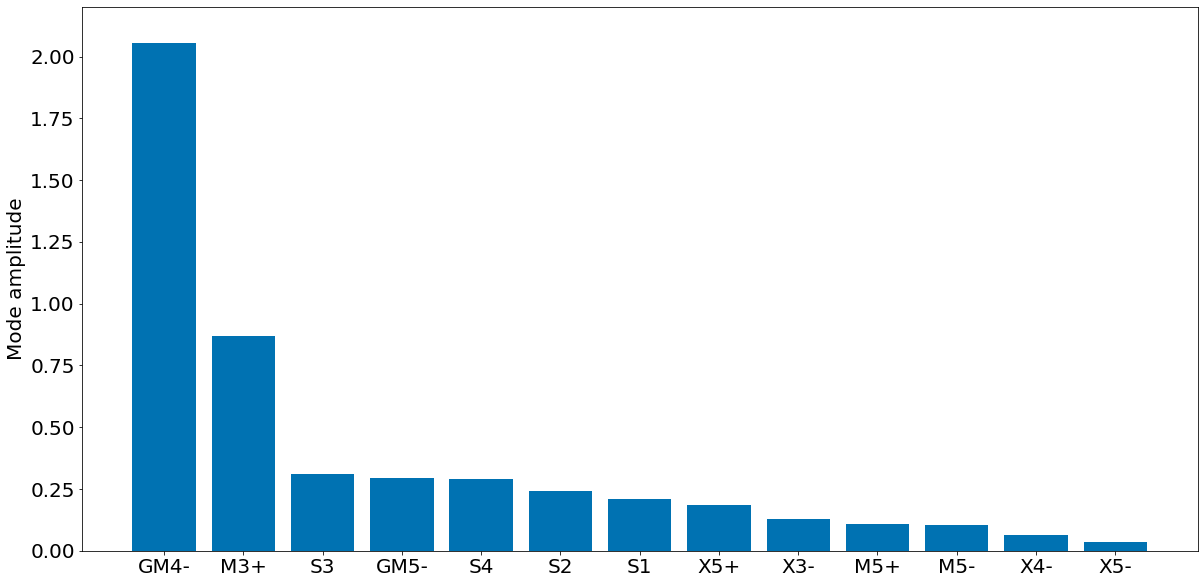

<ipython-input-15-1782d9c84484>:21: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use('seaborn-colorblind')


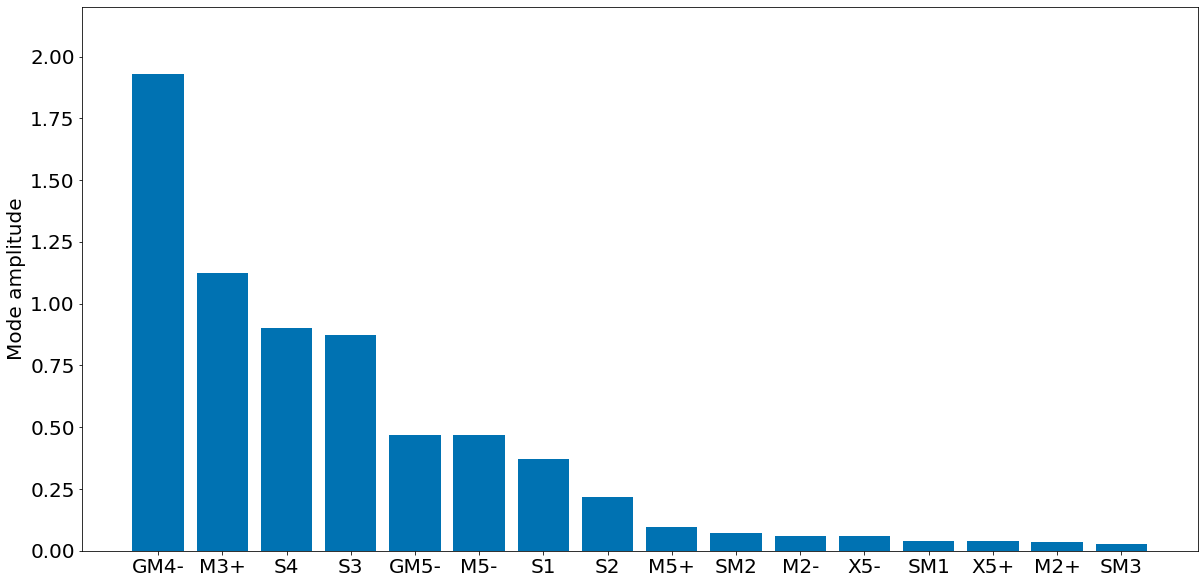

<ipython-input-15-1782d9c84484>:21: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use('seaborn-colorblind')


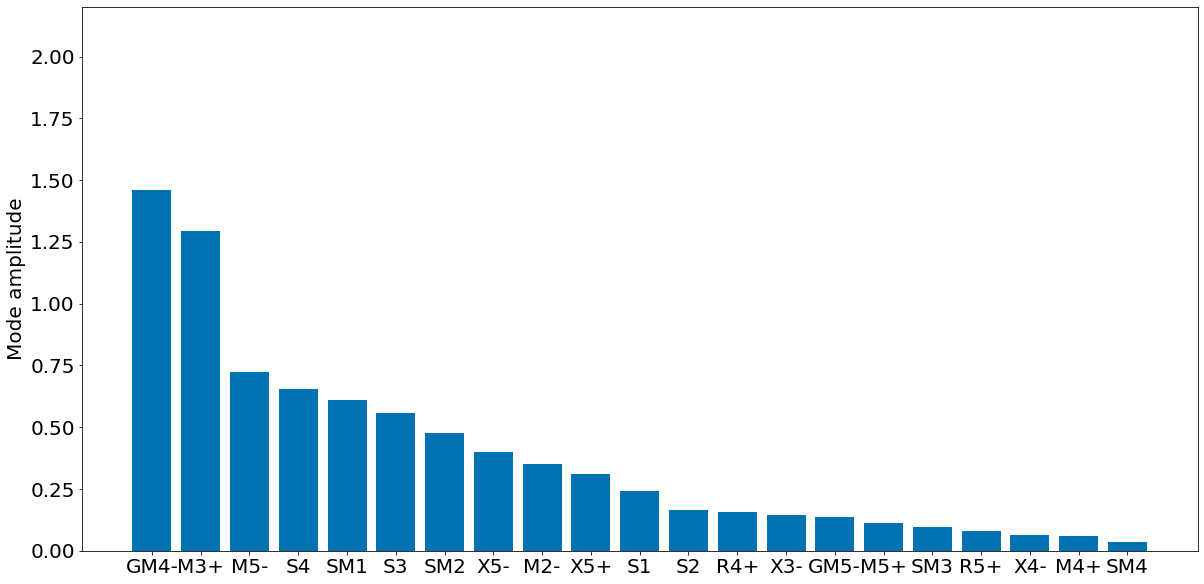

In [23]:
plot_data(data_214,amp_214)
plot_data(data_412,amp_412)
plot_data(data_88,amp_88)